# Question 1

If we try to compare two submissions for plagiarized text, we can simply do it the brute force way and compare every substring. But that would take a lot of time and would be very inefficient. Here, using data structures and algorithms, we optimize the process. We use hash tables and hash functions to achieve this. By using hash function, we can convert the substring into an integer representation and then we can use the modulo operator to find the index of where that should be inserted into the list of buckets we have. But now, we can see a problem. If two substrings somehow end up with the same integer representation, then, they will also end up in the same index in our list. That is called a collision. Therefore, here we can see that there are two things that are important to take into account of. The first is the hash function itself. The ideal hash function needs to have the following properties:
1. Repeatable: if we have the same input, it should give us the same result every time we run the function
2. Fast: it should be fast to compute
3. Output unsigned integer: it should not output a negative integer
4. Random distribution: it should randomly distribute the keys among the output space. We can have an unlimited number of inputs but our output space is limited. If we are using unsigned integers, we can have from 0 to 2^32-1 and it should be randomly distributed among these numbers
5. Small differences in the input should have large differences in output: for example, the hash value for 'dog' and 'dogs' should give us completely different results that are not very close to each other. This will be helpful in making sure that they don't get accidentally mixed up

The other parameter that we need to keep track of is the value of q, the value we mod our hash value by to get the index in our hash table. To begin with, it is preferred for it to be a prime number. That is because, if it's not a prime number, when we use it to mod other numbers, we can have the same remainders for a lot of numbers and that causes a collision. If we use a prime number, though, we can decrease the rate of collision because when we mod using a prime number, the chance that different numbers will have the same remainder is small as compared with non-prime numbers. Now, the question becomes which prime number should we choose? Even though there is no right answer for this, in my implementation, I set this value equal to the smallest prime number just above the table size. So I need to clarify how I choose the table size. For my two strings, x and y, if I need to create a hash table for x, then I set the table size equal to the smallest prime number that is greater than 1.2 times the number of characters in x. Therefore, if x has a length of 5, I would multiply 5 by 1.2 and find the smallest prime number that is greater than 1.2 * 5. I chose 1.2 because I want the table size to be a bit bigger and thus have a bit more space for the substrings. This way, the table won't be completely full and there won't be overflowing. If the table size is too small, it is easy for the table to fill up and overflow unless we dynamically adjust it after a certain portion of the table is full. This is what happens in the Python dictionary as well. It starts by allocating 8 slots and then when the table starts to become full, then it creates another table and then copies all of the stuff over to the new table. This happens when the load factor is about 2/3. As we can see here, there is a trade-off being made. If we want the constant time we are promised using hash tables we should make the size of our hash table very big but if we want to save space and only add additional memory when we need it, then that means we have to copy over the whole table every time and takes time (which is slower than constant time). But this is not the only way to deal with collisions. We can also deal with them using chaining. In this method, every bucket in the list is a linked list and thus, if we have similar indexes that need to be fulfilled in the same spot, we just add them to the linked list. There are certain assumptions we need to make here as well. In order to add them to the linked list, we need to iterate through the linked list, but we don’t have to do that if we just add the new node to the head of the linked list (like I am doing in this assignment) or if the linked list has a pointer to the tail and we can just jump to the tail and add it there. In these two cases, the time for insertion in the hash table is still going to be constant time even if there are collisions because the way we are inserting it into the hash table is not affected by the number of elements already in there.

In [1]:
class HashTable:
    '''
    This class represents an implementation of a hash table. It includes all the attributes and methods needed to 
    work with the hash table.
    '''
    def __init__(self, m, k):
        """
        Creates the hash table instance
        
        Parameters
        ----------
        m : int
            The number of characters in the input string
        hash_table : list
            A list of nodes that carries the key and value(s) 
        q : int
            A number that we take the modulo of the hash value by to get the index in the hash table
        k : int
            the length of te substring to be checked between the two submissions
        """
        self.m = self.get_prime(int(m*1.2))
        self.hash_table = [None for _ in range(self.m)]
        self.q = self.m
        self.k = k
        self.base = 7
        
    
    def get_prime(self, n):
        """
        Gets the smallest prime number greater than a given number
        
        Parameters
        ----------
        n : int
            The number we wish to find the prime number just above it
            
        Returns
        -------
        min_prime : int
            The smallest integer above the given number
        """
        np=[]
        isprime=[]
        for i in range (n+1,n+200):
            np.append(i)
        for j in np:
            val_is_prime = True
            for x in range(2,j-1):
                if j % x == 0:
                    val_is_prime = False
                    break
            if val_is_prime:
                isprime.append(j)
               
        min_prime = min(isprime)
        
        return min_prime
         
    def get_index(self, key):
        """
        Gets the index in the hash table of a hash value
        
        Parameters
        ----------
        key : int
            The hash value we wish to find the index of to be assigned in the hash table
        Returns
        -------
        int
            The index in the hash table
        """
        return key % self.m  # Take the module by the size of the table
    
    def to_int(self, string):
        """
        Calculates and returns the integer representation of a string
        
        Parameters
        ----------
        string : string
            The string whose int representation is to be calculated
        Returns
        -------
        total : int
            The integer representation of the given string
        """
        total = 0
        len_str = len(string)
        # For every char in the string, get the ascii value and multiply it by the base to the power of where it is located
        # and add it to the total
        for i in string:
            total += ord(i)*self.base**(len_str-1)
            len_str -= 1

        return total

    def to_hash(self, string):
        """
        Calculates the hash value of a string
        
        Parameters
        ----------
        string : string
            The string whose hash value is to be calculated
        Returns
        -------
        hash_value : int
            The hash value of the string
        """
        num = self.to_int(string)  # Get the integer representation of the string
        hash_value = num % self.q  # Take the module of the integer representation by a certain pre determnined prime number
        
        return hash_value
    
    def hash_djb2(self, string):
        """
        Calculates the djb2 hash value of a string
        
        Parameters
        ----------
        string : string
            The string whose djb2 hash value is to be calculated
        Returns
        -------
        hash_value : int
            The djb2 hash value of the string
        """
        hsh = 5381  # Start by setting the hash value to 5381
        for x in string:
            # Multiply the hsh value by 33 and add the ascii code of the char. << 5 is the same thing as multiplying by 2^5
            # and when we add hsh, it's like multplying by 33. Bitwise shift is done instead of directly multiplying by 33
            # because it is much faster since it is a lower level operations
            hsh = (( hsh << 5) + hsh) + ord(x)  
            
        hash_value = hsh & 0xFFFFFFFF
            
        return hash_value
    
    def sdbm(self, string):
        """
        Calculates the sdbm hash value of a string
        
        Parameters
        ----------
        string : string
            The string whose sdbm hash value is to be calculated
        Returns
        -------
        hash_value : int
            The sdbm hash value of the string
        """
        hsh = 0  # Initially set the hash value equal to 0
        for plain_chr in string:
            # << 6 means multiply by 2^6 and << 12 means multiply by 2^12. This is preferred because it's much faster
            hsh = ord(plain_chr) + (hsh << 6) + (hsh << 16) - hsh
            
        return hsh
    
    def create_table_without_rh(self, wordbank):
        """
        Creates a hash table by without using rolling hashing. It calculates the hash value of each substring from scratch
        
        Parameters
        ----------
        wordbank : string
            The string we use to create the hash table
        """
        
        for i in range(len(wordbank)-self.k+1):
            # Iterate through the string and create a substring of length k
            substring = wordbank[i:i+self.k]

            hash_value = self.to_hash(substring)  # Calculate the hash value of each substring
            self.chained_hash_insert(hash_value, i, substring)  # Insert it into the hash table

    def create_table_with_rh(self, wordbank):
        """
        Creates a hash table by using rolling hashing
        
        Parameters
        ----------
        wordbank : string
            The string we use to create the hash table
        """
        for i in range(len(wordbank)-self.k+1):
            # Iterate through the string and create a substring of length k
            substring = wordbank[i:i+self.k]
            if i == 0:  # If it's the first substring, calculate the hash value from scratch
                hash_value = self.to_hash(substring)
                self.chained_hash_insert(hash_value, i, substring) # Insert it into the hash table
            else: 
                # For the rest of the subsequent substrings, use module arithmetic and use rolling hashing to calculate 
                # hash value of the subsequent substrings and insert it into the hash table
                hash_value = (((hash_value - ord(wordbank[i-1])*self.base**(self.k-1) % self.q)*self.base) % self.q + ord(wordbank[i+self.k-1])) % self.q
                self.chained_hash_insert(hash_value, i, substring)

    def create_table_djb2(self, wordbank):
        """
        Creates a hash table by using the djb2 algorithm
        
        Parameters
        ----------
        wordbank : string
            The string we use to create the hash table
        """
        for i in range(len(wordbank)-self.k+1):
            substring = wordbank[i:i+self.k]  # Iterate through the string and create a substring of length k
            
            hash_value = self.hash_djb2(substring)  # Calculate the hash value using the djb2 algorithm
            self.chained_hash_insert(hash_value, i, substring)  # Insert it into the hash table
        
    def create_table_sdbm(self, wordbank):
        """
        Creates a hash table by using the sdbm algorithm
        
        Parameters
        ----------
        wordbank : string
            The string we use to create the hash table
        """
        for i in range(len(wordbank)-self.k+1):
            substring = wordbank[i:i+self.k] # Iterate through the string and create a substring of length k

            hash_value = self.sdbm(substring) # Calculate the hash value using the djb2 algorithm
            self.chained_hash_insert(hash_value, i, substring) # Insert it into the hash table
    
    
    def chained_hash_insert(self, key, value, substring):
        """
        Inserts the nodes into the hash table
        
        Parameters
        ----------
        key : int
            The hash value we use as our key in the hash table
        value : int
            The starting index of the substring we have the hash value of
        substring : string
            The substring we use to compare in case of a possible collision as a last resort
        """
        #create the node to store our key and value
        node = HashTableNode(key, value, substring)
        #find the hashed key for the table
        hashed_key = self.get_index(key)
        if self.hash_table[hashed_key] is not None:
            #if there already exists another node, add the current node on top
            node.nextNode = self.hash_table[hashed_key]
        self.hash_table[hashed_key] = node
        
        
    def chained_hash_search(self, key, substring):
        """
        Searches the hash table for a given key and substring
        
        Parameters
        ----------
        key : int
            The hash value we use as our key in the hash table
        value : int
            The starting index of the substring we have the hash value of
        substring : string
            The substring we use to compare in case of a possible collision as a last resort
        """
        #find the key after hashing
        hashed_key = self.get_index(key)
        #start traversing from this node
        cur = self.hash_table[hashed_key]
        #traversing the list to find the value
        lst = []
        while cur is not None:
            if cur.key == key:
                if cur.substring == substring:
                    lst.append((cur.value, cur.substring))
            cur = cur.nextNode
        if len(lst) != 0:
            return lst
        else:
            return False
    
    
    def chained_hash_delete(self, key):
        """
        Deletes a given key from the hash table
        
        Parameters
        ----------
        key : int
            The hash value we use as our key in the hash table
        """
        hashed_key = self.get_index(key)
        prev = None
        cur = self.hash_table[hashed_key]
        while cur is not None:
            if cur.key == key:
                #if the value is not at the top of the linked list update the previous node's value to be the node's next node
                if prev is not None:
                    prev.nextNode = cur.nextNode
                #if the value is at the top of the linked list we simply need to update the top to be the next node
                else:
                    self.hash_table[hashed_key] = cur.nextNode
                return
            prev = cur
            cur = cur.nextNode
        raise Exception("Key-value pair not found!")
        
    def get_load_factor(self):
        """
        Calculates and returns the load factor of the hash table
        
        Returns
        -------
        load_factor : float
            The load factor of the hash tablke
        """
        entries = 0
        # Iterate through the hash table and get the number of entries that are not None
        for i in self.hash_table:
            if i is not None:
                entries += 1 
        
        load_factor = entries/self.m  # Divide the number of entries by the table size
        
        return load_factor
    
    
class HashTableNode:
    '''
    This hash table node stores the key and value pairs.
    Additionally, it has the attribute next and prev
    for us to traverse the linked list and go to the
    next node or previous node, respectively.
    '''
    def __init__(self, key, value, substring, nextNode = None, prev = None):
        """
        Creates the hash table node instance
        
        Parameters
        ----------
        key : int
            The hash value of a substring to be stored
        value : int
            The starting index of the substring
        substring : string
            The substring we calculated the hash value of. We only store this and use it to compare only as a last resort if the hash values of two strings are equal and we need to be sure to if they are the same
        nextNode : HashTableNode
            The node that is next to the current node in the linked list chain
        prev : HashTableNode
            The node that is previous to the current node in the linked list chain
        """
        self.key = key
        self.value = value
        self.substring = substring  
        self.nextNode = nextNode
        self.prev = prev
        
    def __str__(self):
        return f'{self.key}, {self.value}'

In [16]:
def hash_djb2(string):
    """
    Calculates the djb2 hash value of a string

    Parameters
    ----------
    string : string
        The string whose djb2 hash value is to be calculated
    Returns
    -------
    hash_value : int
        The djb2 hash value of the string
    """
    hsh = 5381  # Start by setting the hash value to 5381
    for x in string:
        # Multiply the hsh value by 33 and add the ascii code of the char. << 5 is the same thing as multiplying by 2^5
        # and when we add hsh, it's like multplying by 33. Bitwise shift is done instead of directly multiplying by 33
        # because it is much faster since it is a lower level operations
        hsh = (( hsh << 5) + hsh) + ord(x)  

    hash_value = hsh & 0xFFFFFFFF

    return hash_value

def sdbm(string):
    """
    Calculates the sdbm hash value of a string

    Parameters
    ----------
    string : string
        The string whose sdbm hash value is to be calculated
    Returns
    -------
    hash_value : int
        The sdbm hash value of the string
    """
    hsh = 0  # Initially set the hash value equal to 0
    for plain_chr in string:
        # << 6 means multiply by 2^6 and << 12 means multiply by 2^12. This is preferred because it's much faster
        hsh = ord(plain_chr) + (hsh << 6) + (hsh << 16) - hsh

    return hsh

In [2]:
def check_plagiarism_with_rh(x,y,k):
    """
    Returns where the similarities between x and y is. The table for x is created using rolling hashing

    Parameters
    ----------
    x : string
        first submission
    y : string
        Second submission
    k : int
        Length of the substring to be checked
    Returns
    -------
    possible_combos : list
        A list of tuples (i,j) where similarities occur between the two submissions where i is the starting index in x and j is the starting index in y
    """
    possible_combos = []
    
    # Clean the inputs
    x = ''.join(x.replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()).lower()
    y = ''.join(y.replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()).lower()
    
    HT = HashTable(len(x),k) # Initialize the hash table object

    HT.create_table_with_rh(x) # Create a hash table for x using rolling hashing
    
    
    for j in range(len(y)-k+1):
        # Iterate through y and get substrings of length k
        substring = y[j:j+k]
        if j == 0: 
            hash_value = HT.to_hash(substring)  # If the substring is the first, calculate the hash value from scratch
            result = HT.chained_hash_search(hash_value, substring)  # Search it in the hash table for x to make a comparison
            # If found, get the results and append them to the possible combinations list
            if result is not False:
                for res in result:
                    possible_combos.append((res[0], j))
        else:
            # Calculate the hash value for the subsequent substrings in y using rolling hashing
            hash_value = (((hash_value - ord(y[j-1])*HT.base**(k-1) % HT.q)*HT.base) % HT.q + ord(y[j+k-1])) % HT.q
            result = HT.chained_hash_search(hash_value, substring)  # Search it in the hash table for x to make a comparison
            # If found, get the results and append them to the possible combinations list
            if result is not False:
                for res in result:
                    possible_combos.append((res[0], j))

    return possible_combos


In [3]:
# Test1: Randomly generated characters
test1x = "aastuveoaisdfioweaf"
test1y = "aastoiasdffffkfioveeaf"

# Test2: Repeated characters
test2x = 'eeeeeeeeee'
test2y = 'eeeeeee'

# Test3: Real plagiarized text
test3x = "The legal system is made up of civil courts, criminal courts and specialty courts, such as family law courts and bankruptcy courts. Each court has its own jurisdiction, which refers to the cases that the court is allowed to hear. In some instances, a case can only be heard in one type of court. For example, a bankruptcy case must be heard in a bankruptcy court. In other instances, more than one court could potentially have jurisdiction. For example, a federal criminal court and a state criminal court would each have jurisdiction over a crime that is a federal drug offense but that is also a state offense."
test3y = "The legal system is made up of criminal and civil courts and specialty courts like bankruptcy and family law courts. Each court is vested with its own jurisdiction. Jurisdiction refers to the types of cases the court is permitted to rule on. Sometimes, only one type of court can hear a particular case. For instance, bankruptcy cases can be ruled on only in bankruptcy court. In other situations, it is possible for more than one court to have jurisdiction. For instance, both a state and federal criminal court could have authority over a criminal case that is also considered an offense under federal and state drug laws."

assert check_plagiarism_with_rh(test1x,test1y,3) == [(0, 0), (1, 1), (10, 7), (12, 14), (16, 19)]
assert check_plagiarism_with_rh(test2x,test2y,7) == [(3, 0), (2, 0), (1, 0), (0, 0)]
assert check_plagiarism_with_rh(test3x,test3y,25) == [(0, 0), (42, 39)]

# Question 2

For the second question, I used three different hash functions that don't use the rolling hashing method. The first one calculates the hash values of the strings in the same way as the first without using the rolling hashing method. This takes a lot more time but it gets the job done. The second one is called the djb2 hash function and it's a clever algorithm that was created by Daniel J. Bernstein in 1991. It accepts a string and then calculates the hash values using the special numbers 33 and 5381. But the trick it uses to reduce the amount of time it takes to run the algorithm is using bitwise shift operators instead of directly multiplying numbers. For example, in the algorithm, it multiplies a number by 33 but instead of directly multiplying the number by 33, it shifts the binary bits 5 units to the left by using the '<<' operator. doing that is equivalent to multiplying the number by 2^5 and then we add the number one more time and means we multiplied the number by 33. This might not seem like much but when we are calculating the hash value over and over again for every substring, then it does really make a difference in terms of the time it takes for the algorithm to run. The line-by-line explanation of the algorithm is given in the code as comments. For the sdbm algorithm, it is the same story. It also gives us a number associated with a string and satisfies most of the conditions that we laid out above that a good hash function should have. It has good distributions among the output space and it gives us a completely different value of output for even a tiny change in input. It also uses the same bitwise operations as the djb2 algorithm and that really helps in decreasing the amount of time it takes for the algorithm to run. The line by line explanation of the function is given in the code, but the gist if it is that, it gives us a good hash value for a given input string that would allow us to decrease the number of collisions since the output is now evenly distributed (which also happens with the djb2 algorithm). How the two compare to each other and with the function that uses rolling hashing is discussed below and supported with experimental plots.

Just like mentioned above, the properties of a good hash function are as follows:
1. Repeatable: if we have the same input, it should give us the same result every time we run the function
2. Fast: it should be fast to compute
3. Output unsigned integer: it should not output a negative integer
4. Random distribution: it should randomly distribute the keys among the output space. We can have an unlimited number of inputs but our output space is limited. If we are using unsigned integers, we can have from 0 to 2^32-1 and it should be randomly distributed among these numbers
5. Small differences in the input should have large differences in the output: for example, the hash value for 'dog' and 'dogs' should give us completely different results that are not very close to each other. This will be helpful in making sure that they don't get accidentally mixed up

And also, just like discussed above, the functions I implemented for the second question are ones that satisfy these properties in that they are easy to calculate and they are fast (because they use the bitwise shift operators). They also distribute evenly among the output space and small perturbations in the input give us completely different output which helps in reducing collisions among similar inputs.

The hash table size for this question is also calculated in the way calculated before. It takes the length of the input string and multiply it by 1.2 to create more space and then take the smallest prime number just above that value. This combination will allow us to have more spaces in the hash table so it doesn't easily get clustered and choosing a prime number as our table size will help us reduce the number of collisions we could have because when we module with a prime number, we get fewer similar remainders as compared to non-prime numbers. 


As for data structures, there aren’t additional data structures used in this question that wasn’t used in q1. I only implemented a hash table and a linked list. As described above, the main job of the linked list is to create a chain of the nodes that have the same index because of collision. Therefore, the use of a linked list is a way to address the collision problem by using chaining.


In [4]:
def check_plagiarism_without_rh(x,y,k):
    """
    Returns where the similarities between x and y is. The table for x is not created using rolling hashing

    Parameters
    ----------
    x : string
        first submission
    y : string
        Second submission
    k : int
        Length of the substring to be checked
    Returns
    -------
    possible_combos : list
        A list of tuples (i,j) where similarities occur between the two submissions where i is the starting index in x and j is the starting index in y
    """
    possible_combos = []
    
    # Clean the inputs
    x = ''.join(x.replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()).lower()
    y = ''.join(y.replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()).lower()
    
    HT = HashTable(len(x),k) # Initialize the hash table object
    HT.create_table_without_rh(x)  # Create a hash table for x without using rolling hashing
    
    for j in range(len(y)-k+1):
        # Iterate through y and get substrings of length k
        substring = y[j:j+k]
        if j == 0:
            hash_value = HT.to_hash(substring) # If the substring is the first, calculate the hash value from scratch
            result = HT.chained_hash_search(hash_value, substring) # Search it in the hash table for x to make a comparison
            # If found, get the results and append them to the possible combinations list
            if result is not False:
                for res in result:
                    possible_combos.append((res[0], j))
        else:
            # Calculate the hash value for the subsequent substrings in y using rolling hashing
            hash_value = (((hash_value - ord(y[j-1])*HT.base**(k-1) % HT.q)*HT.base) % HT.q + ord(y[j+k-1])) % HT.q
            result = HT.chained_hash_search(hash_value, substring) # Search it in the hash table for x to make a comparison
            # If found, get the results and append them to the possible combinations list
            if result is not False:
                for res in result:
                    possible_combos.append((res[0], j))

    return possible_combos


In [20]:
def check_plagiarism_djb2(x,y,k):
    """
    Returns where the similarities between x and y is. The table for x is created using the djb2 algorithm

    Parameters
    ----------
    x : string
        first submission
    y : string
        Second submission
    k : int
        Length of the substring to be checked
    Returns
    -------
    possible_combos : list
        A list of tuples (i,j) where similarities occur between the two submissions where i is the starting index in x and j is the starting index in y
    """
    possible_combos = []
    
    # Clean the inputs
    x = ''.join(x.replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()).lower()
    y = ''.join(y.replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()).lower()
    
    HT = HashTable(len(x),k) # Initialize the hash table object
    HT.create_table_djb2(x) # Create a hash table for x using the djb2 algorithm
    
    for j in range(len(y)-k+1):
        # Iterate through y and get substrings of length k
        substring = y[j:j+k]

        hash_value = hash_djb2(substring)  # Calculate the hash value of each substring in y using the djb2 algorithm
        result = HT.chained_hash_search(hash_value, substring) # Search it in the hash table for x to make a comparison
        # If found, get the results and append them to the possible combinations list
        if result is not False:
            for res in result:
                possible_combos.append((res[0], j))

    return possible_combos


In [21]:
def check_plagiarism_sdbm(x,y,k):
    """
    Returns where the similarities between x and y is. The table for x is created using the sdbm algorithm

    Parameters
    ----------
    x : string
        first submission
    y : string
        Second submission
    k : int
        Length of the substring to be checked
    Returns
    -------
    possible_combos : list
        A list of tuples (i,j) where similarities occur between the two submissions where i is the starting index in x and j is the starting index in y
    """
    possible_combos = []
    
    # Clean the inputs
    x = ''.join(x.replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()).lower()
    y = ''.join(y.replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()).lower()
    
    HT = HashTable(len(x),k)  # Initialize the hash table object
    HT.create_table_sdbm(x)  # Create a hash table for x using the sdbm algorithm
    
    for j in range(len(y)-k+1):
        # Iterate through y and get substrings of length k
        substring = y[j:j+k]
        
        hash_value = sdbm(substring)  # Calculate the hash value of each substring in y using the sdbm algorithm
        result = HT.chained_hash_search(hash_value, substring)  # Search it in the hash table for x to make a comparison
        # If found, get the results and append them to the possible combinations list
        if result is not False:
            for res in result:
                possible_combos.append((res[0], j))

    return possible_combos


In [23]:
# Test1: Randomly generated characters
test1x = "aastuveoaisdfioweaf"
test1y = "aastoiasdffffkfioveeaf"

# Test2: Repeated characters
test2x = 'eeeeeeeeee'
test2y = 'eeeeeee'

# Test3: Real plagiarized text
test3x = "The legal system is made up of civil courts, criminal courts and specialty courts, such as family law courts and bankruptcy courts. Each court has its own jurisdiction, which refers to the cases that the court is allowed to hear. In some instances, a case can only be heard in one type of court. For example, a bankruptcy case must be heard in a bankruptcy court. In other instances, more than one court could potentially have jurisdiction. For example, a federal criminal court and a state criminal court would each have jurisdiction over a crime that is a federal drug offense but that is also a state offense."
test3y = "The legal system is made up of criminal and civil courts and specialty courts like bankruptcy and family law courts. Each court is vested with its own jurisdiction. Jurisdiction refers to the types of cases the court is permitted to rule on. Sometimes, only one type of court can hear a particular case. For instance, bankruptcy cases can be ruled on only in bankruptcy court. In other situations, it is possible for more than one court to have jurisdiction. For instance, both a state and federal criminal court could have authority over a criminal case that is also considered an offense under federal and state drug laws."

# Here, I test each of the three additional hash functions I came up with in q2 and amke sure they all give me the same results

assert check_plagiarism_without_rh(test1x,test1y,3) == check_plagiarism_djb2(test1x,test1y,3) == check_plagiarism_sdbm(test1x,test1y,3) == [(0, 0), (1, 1), (10, 7), (12, 14), (16, 19)]
assert check_plagiarism_without_rh(test2x,test2y,7) == check_plagiarism_djb2(test2x,test2y,7) == check_plagiarism_sdbm(test2x,test2y,7) == [(3, 0), (2, 0), (1, 0), (0, 0)]
assert check_plagiarism_without_rh(test3x,test3y,25) == check_plagiarism_djb2(test3x,test3y,25) == check_plagiarism_sdbm(test3x,test3y,25) == [(0, 0), (42, 39)]

# Question 3

To begin with, this algorithm can only detect plagiarism under certain conditions. It only considers ASCII characters and doesn't detect other characters. It also doesn't have any way of telling if the similar substring found in the 2 submissions is directly quoted and cited and thus doesn't need to be considered plagiarized. It doesn't take that into account. It does a lot of preprocessing and cleaning the data that some of the stuff might be lost in the process, so even though it is not perfect, it can still help us detect the possibility of plagiarism and we can then make more thorough searching afterward.

When comparing this to a brute force algorithm, it has a lot of advantages. The brute force method gets every substring from the two submissions and compares them character by character and that is very inefficient. If the len of x is m and the len of y is n, then the brute force method will take O(mn) time, and that is not desirable. The algorithm we used here on the other hand, though, not perfect, it has many advantages over the brute force method. For starters, it doesn't compare each substring in the 2 submissions. It hashes them and then creates a hash table that we can then use to compare substrings in the two submissions. As mentioned above, the method of hashing comes with a problem of collisions and they are unavoidable. But we can deal with them in different ways. The way I dealt with them is by using chaining. One big advantage of this is that when we insert new elements into the hash table, we are guaranteed to have constant time insertion regardless of is there is a collision or not. That is because we insert it in the beginning of the linked list. This way, our on average case, insertion will take constant time, and searching will take constant time as well as compared to the brute force way of dealing with this which gave us O(mn) time.


# Question 4

As discussed above, the brute force is the worst in terms of time complexity. But from the different hash functions that we have, we can compare them and see which one outperforms the others. To do this, we can set up an experiment and set up a simulation. I gathered the Shakespeare document from the last assignment and randomly generated x and then randomly generated y from x. I also varied the size of x up to 40,000  so we can see which algorithm performs better when the input gets larger and larger. As expected the one with rolling hashing performs the best. That is because we can think of rolling hashing as a version of dynamic programming. What it does is instead of us calculating the hash value every time from scratch, we use the previously calculated hash value and then adjust that a little bit to get our new hash value. This is dynamic programming because there are overlapping subproblems and we are using the results from one of them to calculate the results of the other. This is also related to optimal substructure as we are getting the optimal result from each computation and then using that in the next instead of computing it from scratch. Therefore, the hash function with rolling hashing performs the best in terms of taking less time, but djb2 is also close even though it doesn’t use any dynamic programming techniques to compute the hash values of subsequent substrings. It can achieve this kind of speed because it is using the bitwise shift operators like discussed above. In the average and best case scenario, all of them will have constant time lookup and insertion, but due to collisions, that is rarely the case and searching might take O(n) time but the constants are significantly lower in the method that uses rolling hashing.

In [24]:
from requests import get

# Get the Shakespear string that we used in the previous assignment. Here, I used it for testing and generating x and y

bad_chars = [';', ',', '.', '?', '!', '1', '2', '3', '4',
             '5', '6', '7', '8', '9', '0', '_', '[', ']']

SH_full = get('http://bit.ly/CS110-Shakespeare').text
SH_just_text = ''.join(c for c in SH_full if c not in bad_chars)
SH_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in SH_just_text)
SH_just_words = [word for word in SH_without_newlines.split(" ") if word != ""]

In [25]:
shakespear = ''.join(SH_just_words).lower()

In [26]:
import random
import time
import numpy as np


# Create lists that hold avergage times for the different hash functions
with_rh_times_avg = []
without_rh_times_avg = []
djb2_times_avg = []
sdbm_times_avg = []

for i in range(1,40):
    x = shakespear[:i*1000]
    y = ''.join([x[random.randint(1,9):10*random.randint(1,9)] for _ in range(10)])  # Create y randomly from x
    
    with_rh_times = []
    without_rh_times = []
    djb2_times = []
    sdbm_times = []
    
    # Run the test multiple times to get results
    for times in range(10):
        with_rh_start = time.time()
        check_plagiarism_with_rh(x,y,20)
        with_rh_stop = time.time()
        with_rh_times.append(with_rh_stop-with_rh_start)
        
        without_rh_start = time.time()
        check_plagiarism_without_rh(x,y,20)
        without_rh_stop = time.time()
        without_rh_times.append(without_rh_stop-without_rh_start)
        
        djb2_start = time.time()
        check_plagiarism_djb2(x,y,20)
        djb2_stop = time.time()
        djb2_times.append(djb2_stop-djb2_start)
        
        sdbm_start = time.time()
        check_plagiarism_sdbm(x,y,20)
        sdbm_stop = time.time()
        sdbm_times.append(sdbm_stop-sdbm_start)
        
    with_rh_times_avg.append(np.mean(with_rh_times))
    without_rh_times_avg.append(np.mean(without_rh_times))
    djb2_times_avg.append(np.mean(djb2_times))
    sdbm_times_avg.append(np.mean(sdbm_times))
    

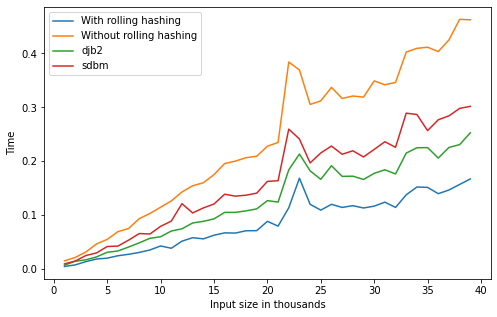

In [28]:
import matplotlib.pyplot as plt

# Plot the results of the simulation for the different hash functions

plt.figure(figsize=(8,5))
plt.plot(list(range(1,40)), with_rh_times_avg, label='With rolling hashing')
plt.plot(list(range(1,40)), without_rh_times_avg, label='Without rolling hashing')
plt.plot(list(range(1,40)), djb2_times_avg, label='djb2')
plt.plot(list(range(1,40)), sdbm_times_avg, label='sdbm')
plt.xlabel('Input size in thousands')
plt.ylabel('Time')
plt.legend()
plt.show()


# Question 5

1. #coderedability: I used standard Python conventions to write clear and readable code. I provide well-written docstrings and comments throughout the assignment and my code is easy to follow and debug if needed because it is well organized
2. #pythonprogramming: I write Python programs that accurately and efficiently implement the required functionality, and do so using Python commands and instructions. When needed, I write my own classes and functions to achieve a certain goal and I explain what I did and why I did it every step of the way
3. #datastructures: I clearly explain the data structure that is well suited to my tasks and I discuss it by providing technical information on the data structure, its abstractions, implementations, and functional operations. For example, for the hash table, I discuss why it was relevant in our problem, I discussed its implementation, and different operations like inserting, searching, deleting, etc. I also contrast it with different data structures and give well-justified and accurate explanations supporting my choice of the data structure for the given problem. In this case, I compared the use of a hash table with other data structures and accurately justified why the hash table is the most optimal data structure to use in this case because of its constant time look ups and insertions
4. #algorithmicstrategies: I discuss and justify every algorithmic choice I made. When using a randomization technique to produce the plots for testing, I explained why I did that. When I used rolling hashing and compared that to dynamic programming because they are both a way of addressing the same subproblems that are overlapping, I justified that as well. At every step of the way, I explain the choices I make in what kind of algorithm I choose to address a problem and justify it thoroughly
5. #computationalcritique: This kind of overlaps with how I used algorithmic strategies and data structures but for every problem, I had different choices for the data structure or algorithm I could choose, and the one I chose is by comparing different approaches, seeing their benefits and downfalls, get the computational complexity for space and time and choose the best data structure and algorithm that suits the problem

1. #breakitdown: For this assignment, I applied break it down for every problem tacking a single problem every step of the way
2. #dataviz: I produced clear and concise plots that describe my data in a way that is easy to read and get information from 
